### Importing libraries

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Suppressing warnings

In [163]:
import warnings
warnings.filterwarnings('ignore')

In [164]:
lead = pd.read_csv('Leads.csv')

In [165]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data inspection

In [166]:
lead.shape

(9240, 37)

In [167]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [168]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In Categorical columns 'Select' option is there whcih means that customer didnot select any option.So, it can be treated as NULL

In [169]:
lead = lead.replace('Select',np.nan)

In [170]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [171]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

### Dropping Missing values more than 40%

In [172]:
for i in lead :
    if lead[i].isnull().sum()/100>40 :
        lead.drop(i,axis=1,inplace=True)

In [173]:
lead.shape

(9240, 30)

In [174]:
round(lead.isnull().sum()/len(lead),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

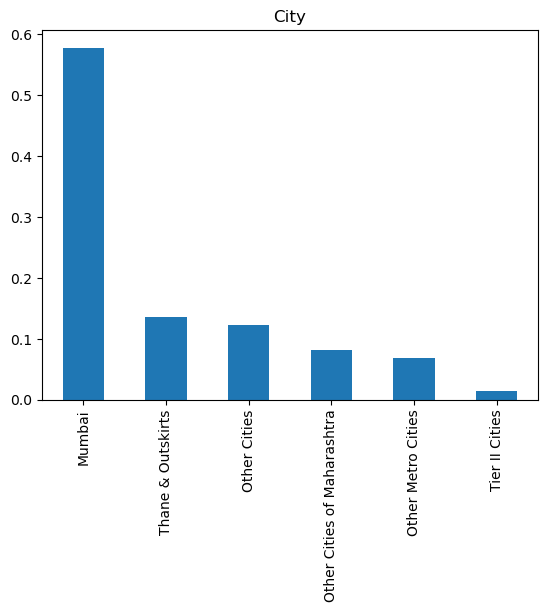

In [175]:
lead.City.value_counts(normalize=True).plot.bar(title= 'City')
plt.xticks(rotation=90)
plt.show()

Most of them are 'Mumbai', replace missing values with 'Mumbai'.

In [176]:
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

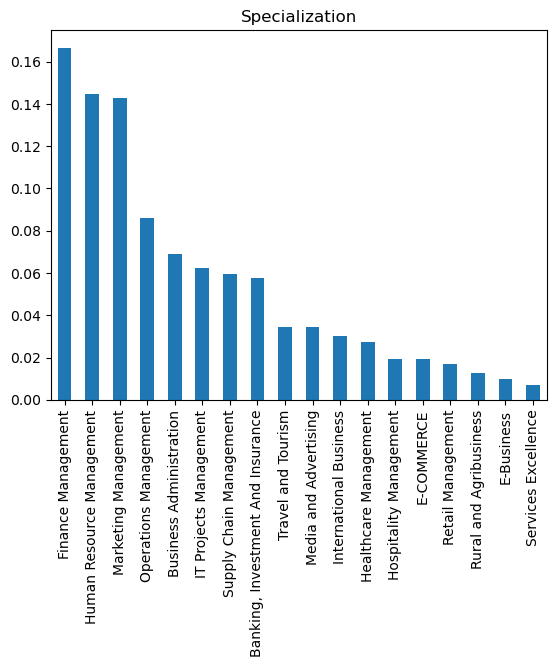

In [177]:
lead.Specialization.value_counts(normalize=True).plot.bar(title= 'Specialization')
plt.xticks(rotation=90)
plt.show()

In Specilization column 37% missing values are there. The reason might be that specilization is not avaiable for the customers to choose, so it can be replace it by 'others'.

In [178]:
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Others')

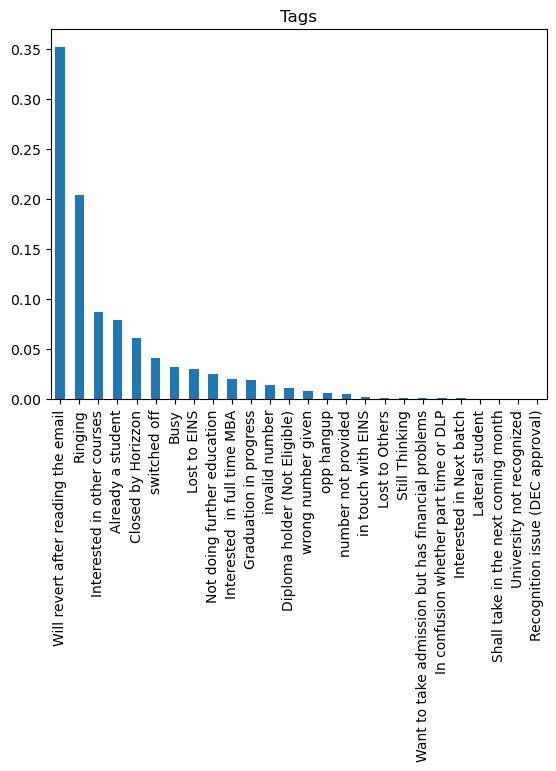

In [179]:
lead['Tags'].value_counts(normalize=True).plot.bar(title= 'Tags')
plt.xticks(rotation=90)
plt.show()

Most of the values are 'Will revert after reading the email'.So, missing values can be replaced with this value.

In [180]:
lead['Tags'] = lead['Tags'].replace(np.nan,'Will revert after reading the email')

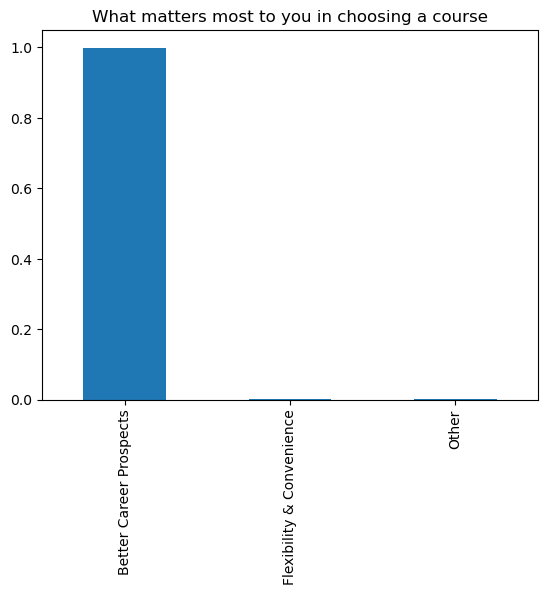

In [181]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True).plot.bar(title= 'What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.show()

In [182]:
round(lead['What matters most to you in choosing a course'].value_counts(normalize= True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

All are choosen the better career prospect it can be dropped

In [183]:
lead = lead.drop('What matters most to you in choosing a course',axis =1)

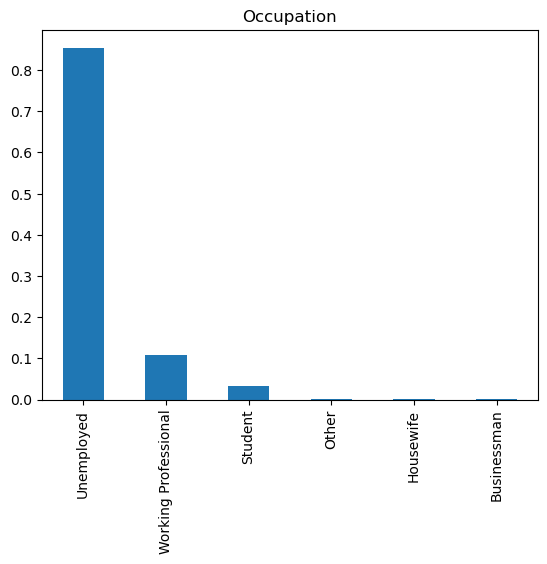

In [184]:
lead['What is your current occupation'].value_counts(normalize=True).plot.bar(title= 'Occupation')
plt.xticks(rotation=90)
plt.show()

In [185]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

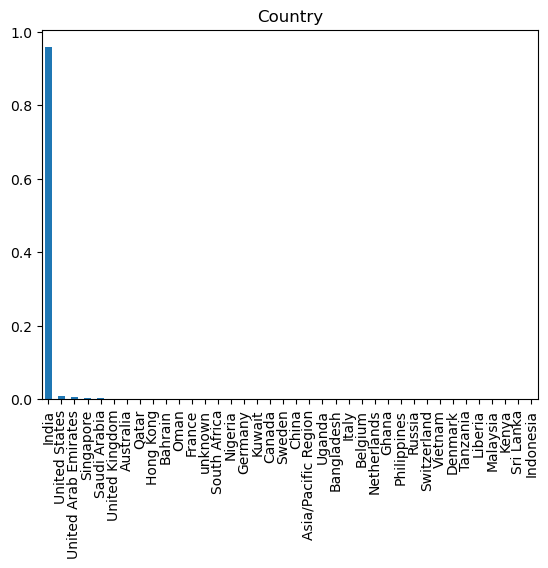

In [186]:

lead['Country'].value_counts(normalize=True).plot.bar(title= 'Country')
plt.xticks(rotation=90)
plt.show()

Most of them are from India.so, missing values can be immute with 'India'

In [187]:
lead['Country'] = lead['Country'].replace(np.nan,'India')

In [188]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

### Dropping rows with null values

In [189]:
lead.dropna(inplace= True)

In [190]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [191]:
(len(lead.index)/9240)*100

98.2034632034632

In [192]:
lead.shape

(9074, 29)

#### Exploratory Data Analysis

In [193]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicate values are present in the dataset.

### Univariate Analysis and Bivariate Analysis

In [194]:
converted = sum(lead['Converted'])/len(lead['Converted'].index)*100
converted

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

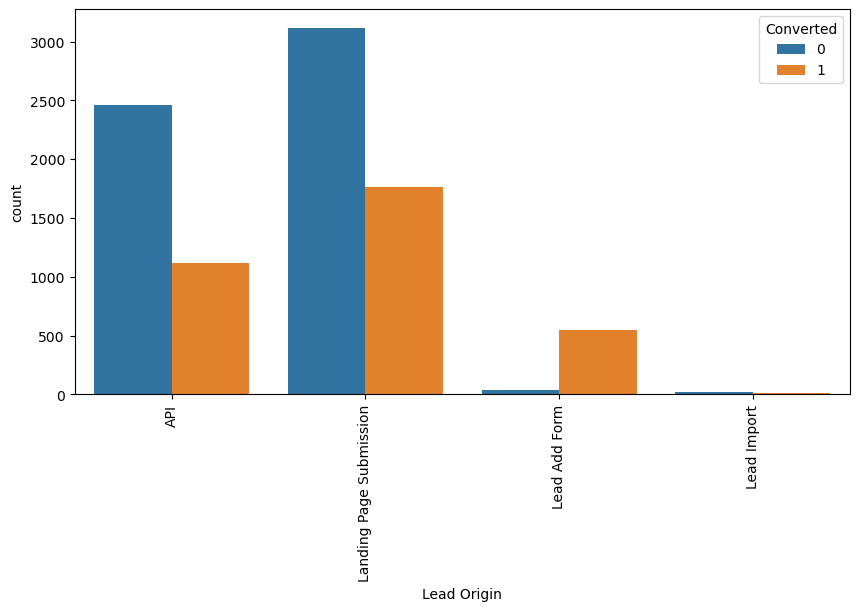

In [195]:
plt.figure(figsize = (10,5))
sns.countplot(x ='Lead Origin',hue='Converted',data =lead)
plt.xticks(rotation =90)


### Inference 
By improving conversion rate of API and Landing Page Submission,Conversion rate can be improved and also more focuse to kept in Lead Add Form to generate more conversions.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

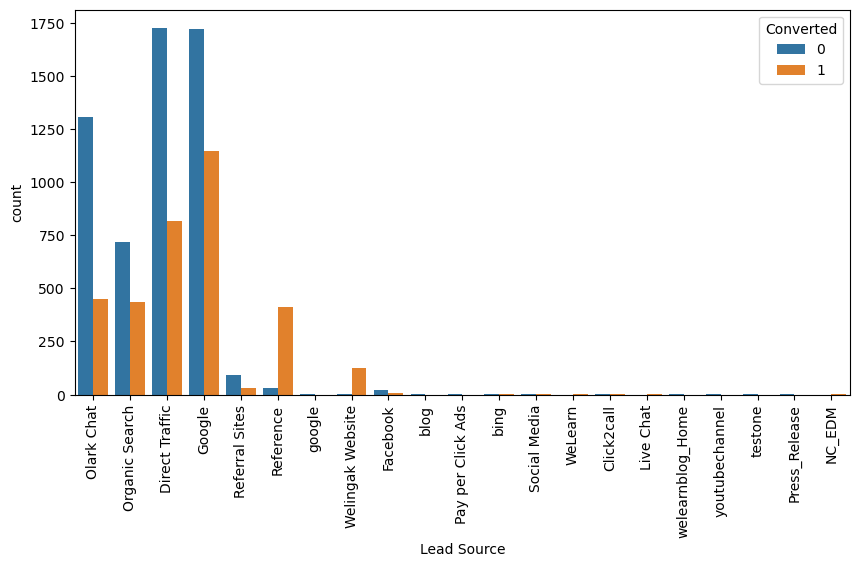

In [196]:
plt.figure(figsize = (10,5))
sns.countplot(x ='Lead Source',hue='Converted',data =lead)
plt.xticks(rotation =90)

### Inference
1.Google and Direct Traffic are having more conversions.

2.Reference and Welingak Website have high conversions.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

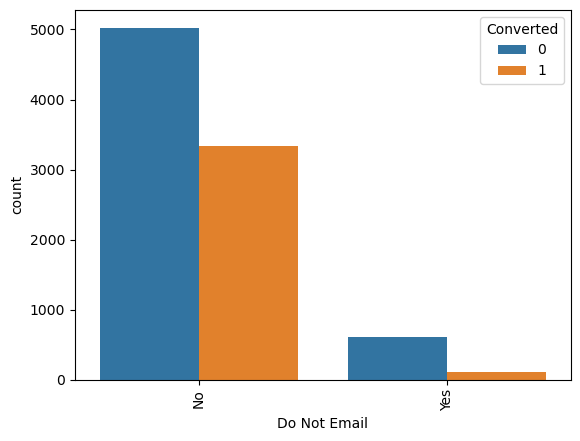

In [197]:
sns.countplot(x ='Do Not Email',hue='Converted',data =lead)
plt.xticks(rotation =90)

### Inference
All opted 'No' only. There is no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

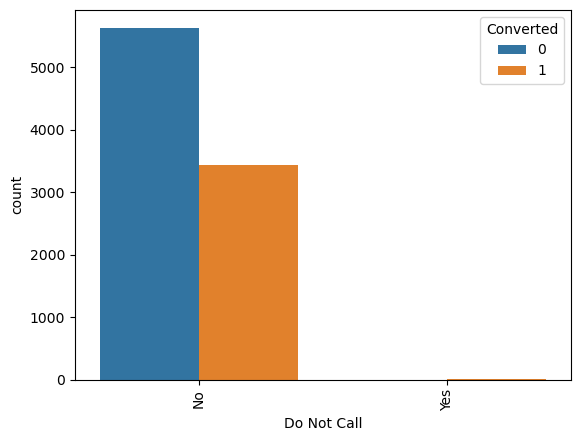

In [198]:
sns.countplot(x ='Do Not Call',hue='Converted',data =lead)
plt.xticks(rotation =90)

### Inference
All opted 'No' so no inference from it.

<Axes: xlabel='Converted', ylabel='TotalVisits'>

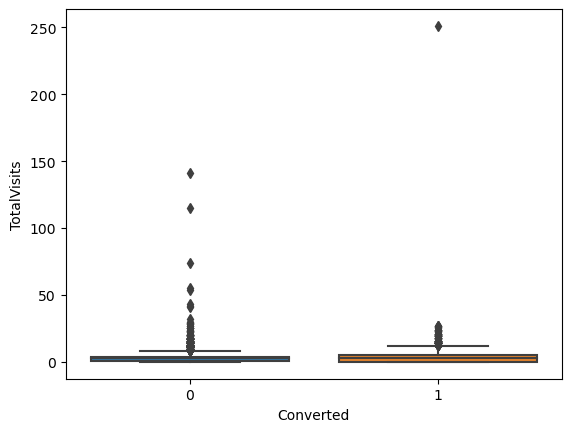

In [199]:
sns.boxplot(x= 'Converted',y= 'TotalVisits',data = lead)

Outliers are present it has to be modified.

In [200]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values

lead['TotalVisits'][lead['TotalVisits']<= percentiles[0]]= percentiles[0]
lead['TotalVisits'][lead['TotalVisits']>= percentiles[1]]= percentiles[1]


<Axes: xlabel='Converted', ylabel='TotalVisits'>

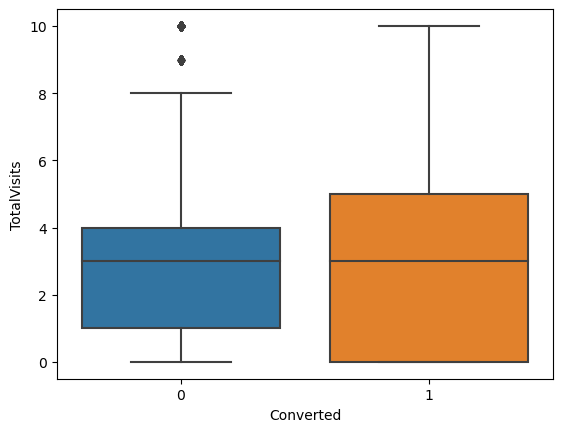

In [201]:
sns.boxplot(x= 'Converted',y= 'TotalVisits',data = lead)

### Inference
No inference from this column because median is same for both.

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

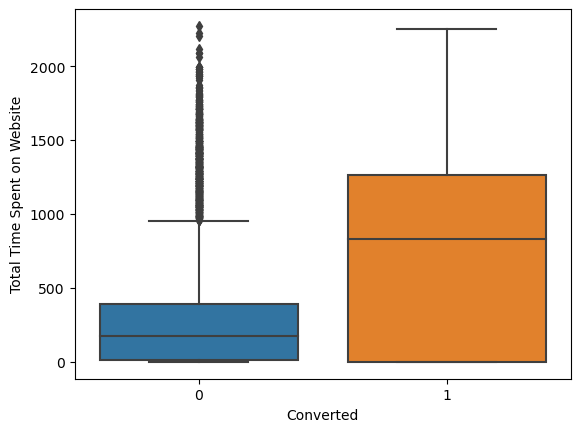

In [202]:
sns.boxplot( x= 'Converted',y= 'Total Time Spent on Website',data = lead)

### Inference
Most of them spending more time on website are converting.

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

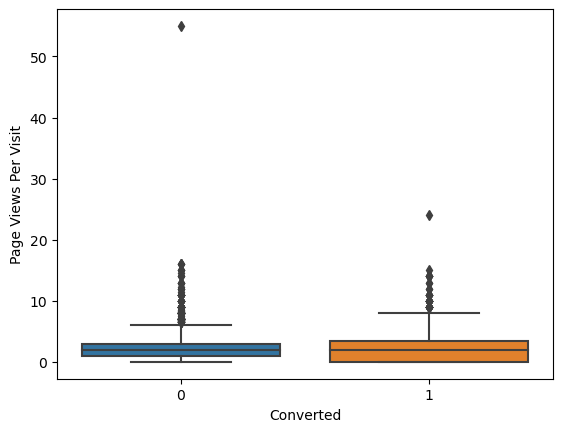

In [203]:
sns.boxplot( x= 'Converted',y= 'Page Views Per Visit',data = lead)

Outliers has to be modified

In [204]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values

lead['Page Views Per Visit'][lead['Page Views Per Visit']<= percentiles[0]]= percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit']>= percentiles[1]]= percentiles[1]


<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

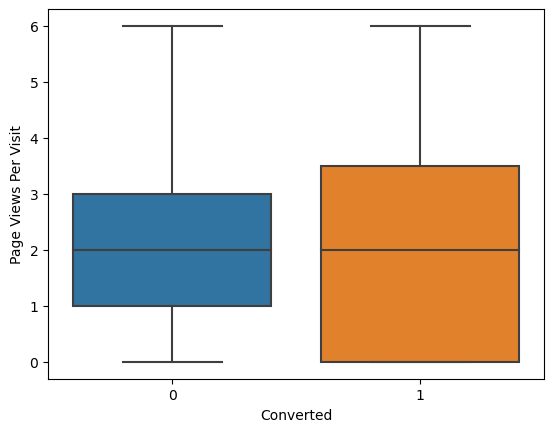

In [205]:
sns.boxplot( x= 'Converted',y= 'Page Views Per Visit',data = lead)

### Inference
Both are having same median.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

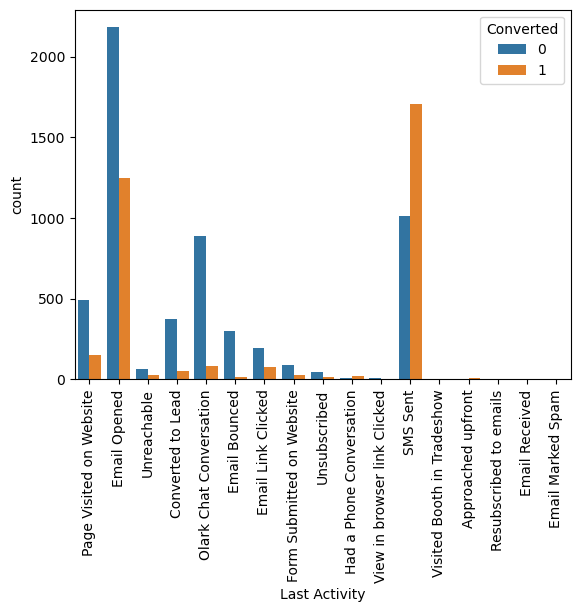

In [206]:
sns.countplot(x= 'Last Activity',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
Conversion rate for both Email Opened and Sms Sent is high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

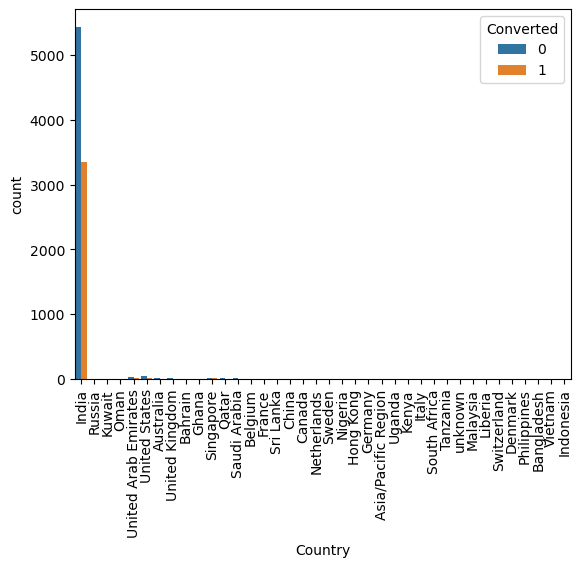

In [207]:
sns.countplot(x= 'Country',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
Majority are from India only no inference from it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

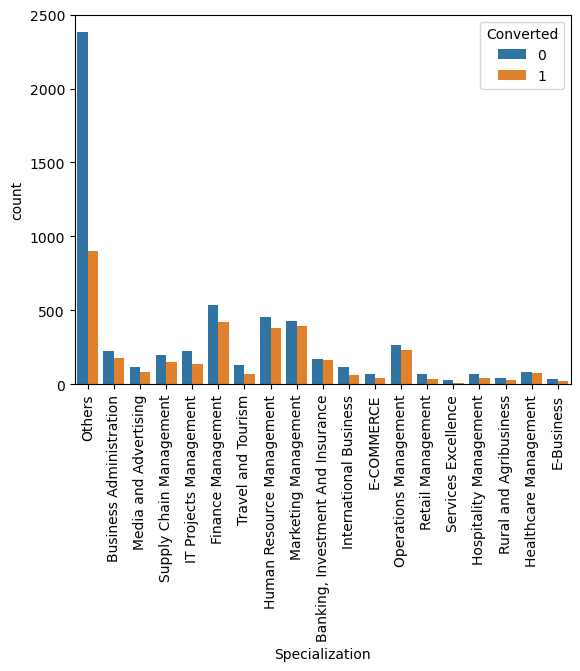

In [208]:
sns.countplot(x= 'Specialization',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
Care to be kept on highest conversion rate.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

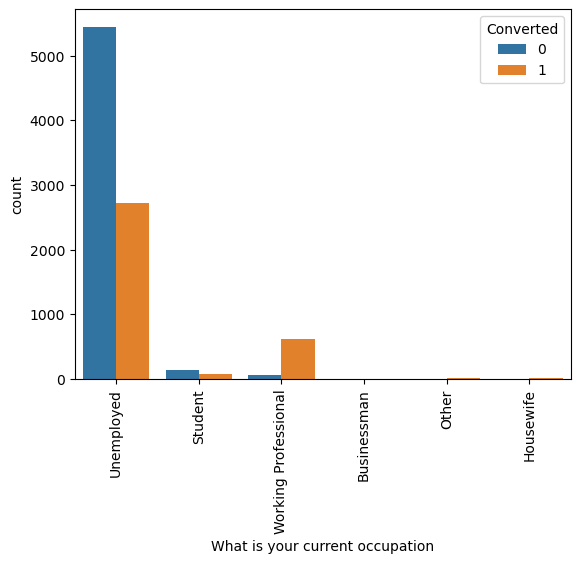

In [209]:
sns.countplot(x= 'What is your current occupation',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
Working professional are and unemployed are more converting.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

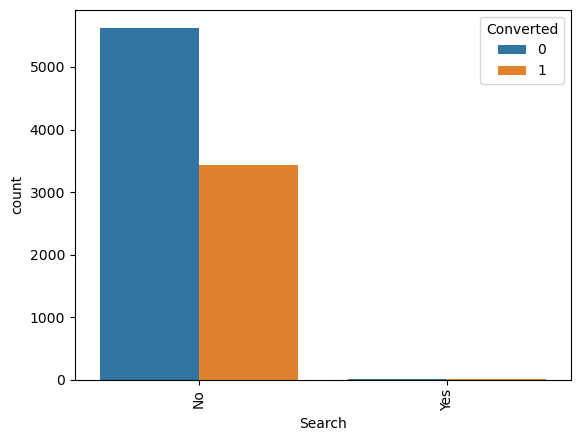

In [210]:
sns.countplot(x= 'Search',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only noinferences from it.

(array([0]), [Text(0, 0, 'No')])

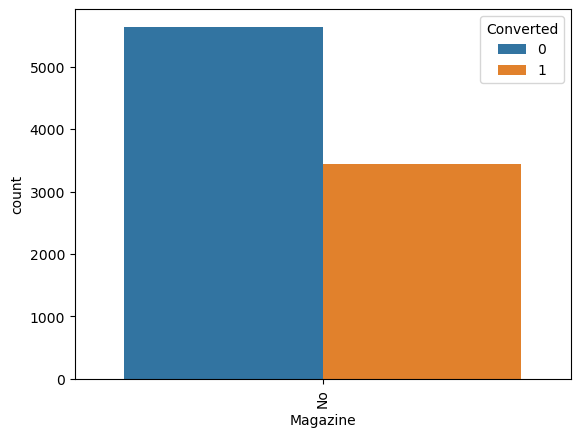

In [211]:
sns.countplot(x= 'Magazine',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

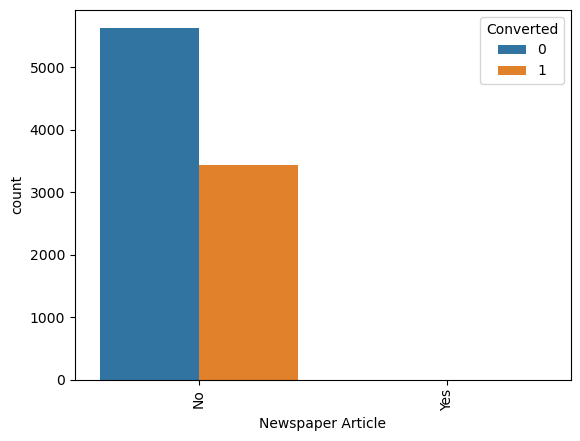

In [212]:
sns.countplot(x= 'Newspaper Article',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

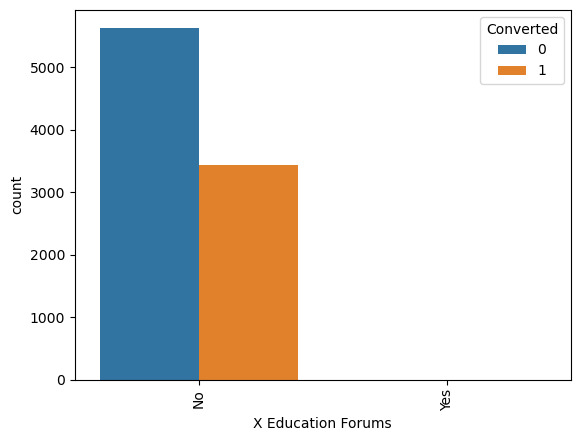

In [213]:
sns.countplot(x= 'X Education Forums',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

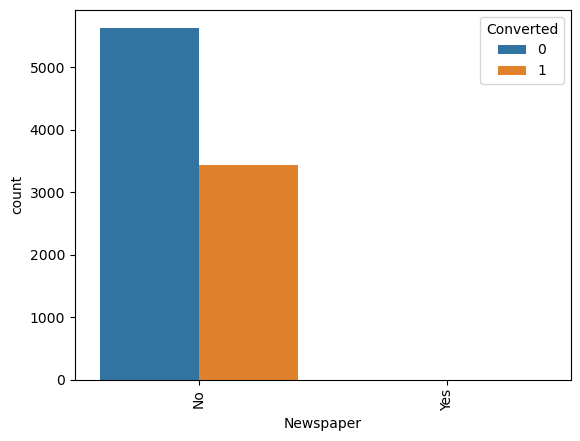

In [214]:
sns.countplot(x= 'Newspaper',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

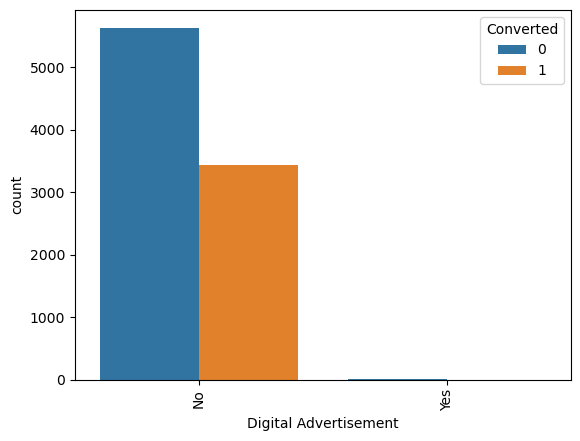

In [215]:
sns.countplot(x= 'Digital Advertisement',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

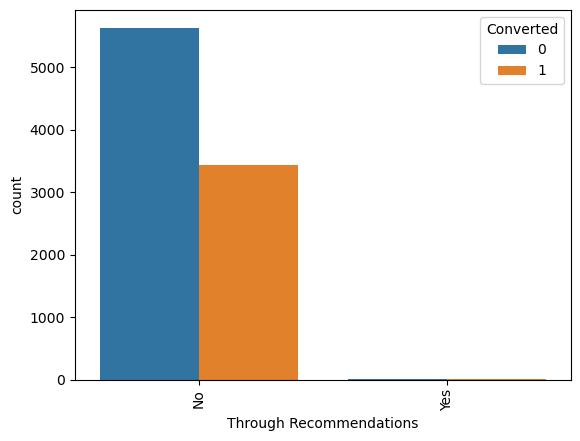

In [216]:
sns.countplot(x= 'Through Recommendations',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0]), [Text(0, 0, 'No')])

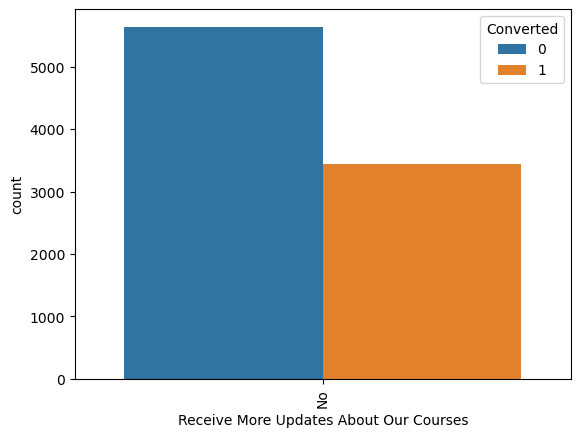

In [217]:
sns.countplot(x= 'Receive More Updates About Our Courses',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

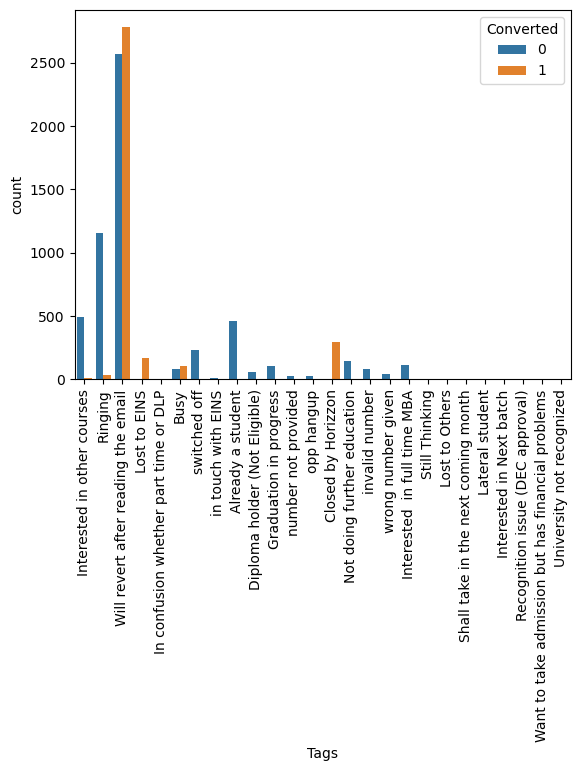

In [218]:
sns.countplot(x= 'Tags',hue ='Converted',data = lead)
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'No')])

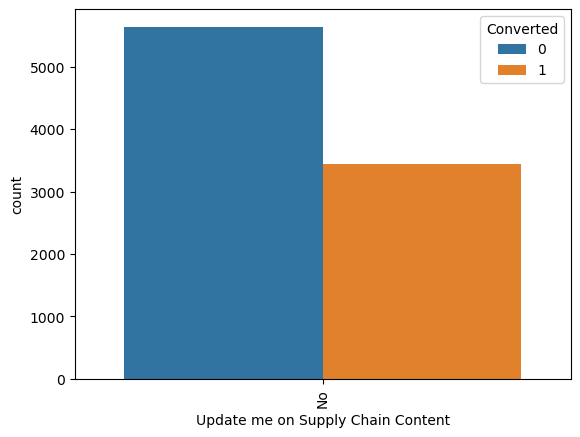

In [219]:
sns.countplot(x= 'Update me on Supply Chain Content',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0]), [Text(0, 0, 'No')])

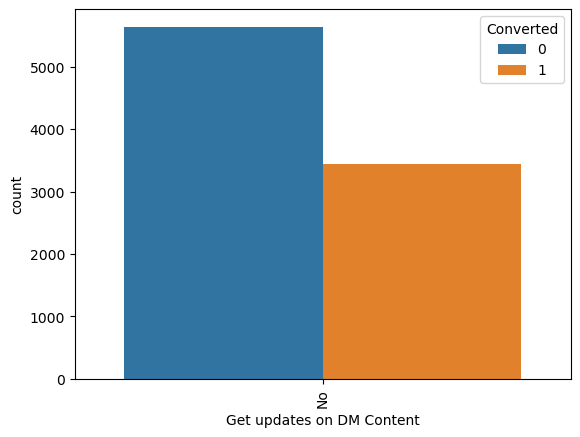

In [220]:
sns.countplot(x= 'Get updates on DM Content',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

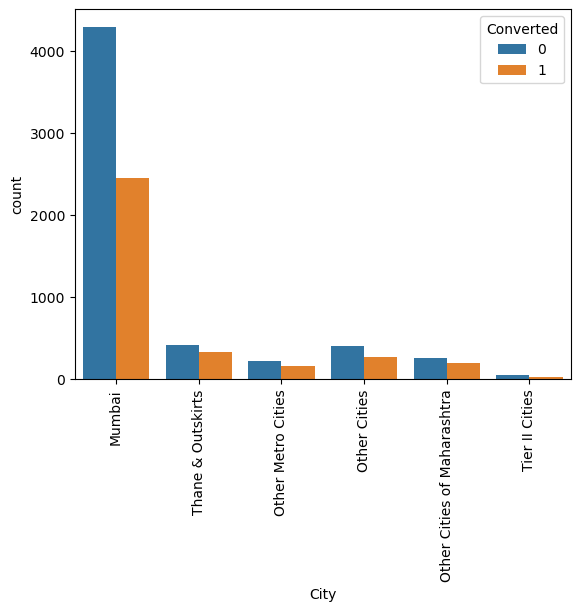

In [221]:
sns.countplot(x= 'City',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
Coverted people are mostly from Mumbai.

(array([0]), [Text(0, 0, 'No')])

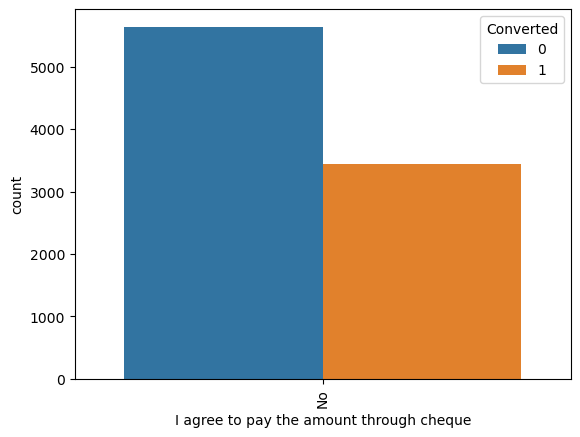

In [222]:
sns.countplot(x= 'I agree to pay the amount through cheque',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

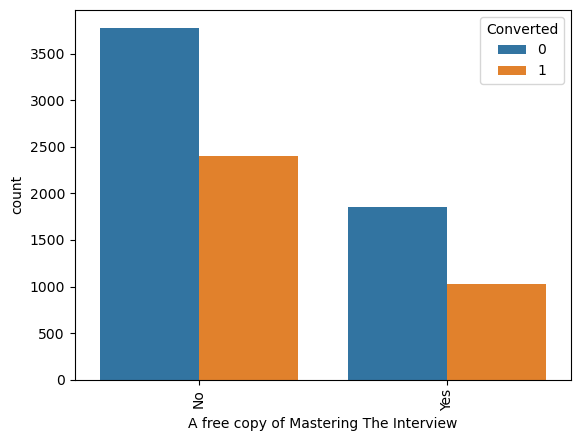

In [223]:
sns.countplot(x= 'A free copy of Mastering The Interview',hue ='Converted',data = lead)
plt.xticks(rotation=90)

### Inference
All are 'No' only no inference from it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

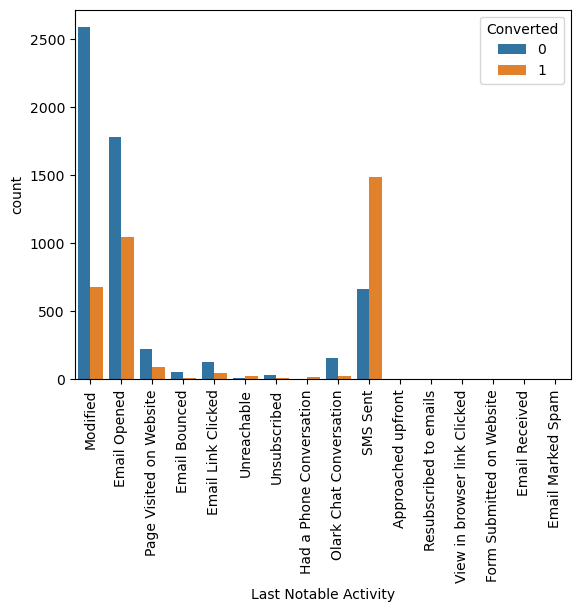

In [224]:
sns.countplot(x= 'Last Notable Activity',hue ='Converted',data = lead)
plt.xticks(rotation=90)

## Dropping of irrelevant columns

In [225]:
lead = lead.drop(['Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Lead Number'],1)

In [226]:
lead.shape

(9074, 14)

In [227]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

### Data preparation

### Converting Yes/No to 1/0

In [228]:
vars =['Do Not Email','Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1,'No':0})

lead[vars] = lead[vars].apply(binary_map)

Creating Dummy variables

In [229]:
dummies = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity']],drop_first= True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [230]:
lead = pd.concat([lead,dummies],axis =1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [231]:
lead = lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity'],axis =1)

In [232]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data into train and test set

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X = lead.drop(['Prospect ID','Converted'],axis =1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [235]:
y= lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

### Scaling the features

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [239]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

37.85541106458012

### Feature selection using RFE

In [240]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=30)            
rfe = rfe.fit(X_train, y_train)

In [241]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False])

In [242]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activ

### Model Building

In [243]:
import statsmodels.api as sm 

### Model 1

In [244]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Mon, 19 Jun 2023   Deviance:                       5133.7
Time:                        19:58:29   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4083
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2804      0.744      3.066      0.002       0.823       3.738
Do Not Email                                            -1.6024      0.219     -7.321      0.000      -2.031      -1.173
Total Time Spent on Website                              1.1057      0.041     26.994      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0307      0.134     -7.692      0.000      -1.293      -0.768
Lead Origin_Lead Add Form                                1.0015      0.929      1.078      0.281      -0.819       2.822
Lead Source_Direct Traffic                              -0.8238      0.379     -2.174      0.030      -1.567      -0.081
Lead Source_Google                                      -0.5387      0.374     -1.442      0.149      -1.271       0.194
Lead Source_Olark Chat                                   0.4843      0.378      1.281      0.200      -0.256       1.225
Lead Source_Organic Search                              -0.7373      0.382     -1.929      0.054      -1.486       0.012
Lead Source_Reference                                    1.7180      0.913      1.882      0.060      -0.071       3.507
Lead Source_Referral Sites                              -0.8778      0.502     -1.749      0.080      -1.862       0.106
Lead Source_Welingak Website                             4.2738      1.147      3.727      0.000       2.026       6.521
Last Activity_Converted to Lead                         -0.8105      0.236     -3.428      0.001      -1.274      -0.347
Last Activity_Email Bounced                             -0.7956      0.451     -1.763      0.078      -1.680       0.089
Last Activity_Had a Phone Conversation                   2.1179      1.134      1.867      0.062      -0.105       4.341
Last Activity_Olark Chat Conversation                   -1.1508      0.204     -5.640      0.000      -1.551      -0.751
Last Activity_SMS Sent                                   0.5743      0.160      3.599      0.000       0.262       0.887
Last Activity_Unsubscribed                               0.5395      0.517      1.044      0.296      -0.473       1.552
Specialization_Others                                   -1.1090      0.126     -8.801      0.000      -1.356      -0.862
What is your current occupation_Housewife               21.8522   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Student                 -0.5092      0.665     -0.766      0.444      -1.813       0.794
What is your current occupation_Unemployed              -0.9678      0.625     -1.547      0.122      -2.194       0.258
What is your current occupation_Working Professional     1

 P value of Last Notable Activity_Resubscribed to emails is high it can be dropped.

In [245]:
col1 =cols.drop('Last Notable Activity_Resubscribed to emails')

### Model 2

In [246]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.7
Date:                Mon, 19 Jun 2023   Deviance:                       5135.4
Time:                        19:58:29   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2953      0.744      3.087      0.002       0.838       3.753
Do Not Email                                            -1.6033      0.219     -7.324      0.000      -2.032      -1.174
Total Time Spent on Website                              1.1057      0.041     26.991      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0299      0.134     -7.686      0.000      -1.292      -0.767
Lead Origin_Lead Add Form                                0.9992      0.929      1.076      0.282      -0.821       2.819
Lead Source_Direct Traffic                              -0.8243      0.379     -2.175      0.030      -1.567      -0.082
Lead Source_Google                                      -0.5392      0.374     -1.443      0.149      -1.272       0.193
Lead Source_Olark Chat                                   0.4875      0.378      1.290      0.197      -0.253       1.228
Lead Source_Organic Search                              -0.7379      0.382     -1.931      0.054      -1.487       0.011
Lead Source_Reference                                    1.7204      0.913      1.884      0.060      -0.069       3.510
Lead Source_Referral Sites                              -0.8788      0.502     -1.751      0.080      -1.862       0.105
Lead Source_Welingak Website                             4.2765      1.147      3.730      0.000       2.029       6.524
Last Activity_Converted to Lead                         -0.8150      0.236     -3.448      0.001      -1.278      -0.352
Last Activity_Email Bounced                             -0.8058      0.451     -1.785      0.074      -1.690       0.079
Last Activity_Had a Phone Conversation                   2.1131      1.134      1.863      0.062      -0.110       4.336
Last Activity_Olark Chat Conversation                   -1.1579      0.204     -5.679      0.000      -1.557      -0.758
Last Activity_SMS Sent                                   0.5601      0.159      3.520      0.000       0.248       0.872
Last Activity_Unsubscribed                               0.5253      0.517      1.017      0.309      -0.488       1.538
Specialization_Others                                   -1.1075      0.126     -8.790      0.000      -1.354      -0.861
What is your current occupation_Housewife               21.8535   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Student                 -0.5097      0.665     -0.767      0.443      -1.813       0.793
What is your current occupation_Unemployed              -0.9672      0.625     -1.547      0.122      -2.193       0.258
What is your current occupation_Working Professional     1

In [247]:
col1 =col1.drop('What is your current occupation_Housewife')

### Model 3

In [248]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.8
Date:                Mon, 19 Jun 2023   Deviance:                       5139.6
Time:                        19:58:30   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7805      0.704      3.951      0.000       1.401       4.160
Do Not Email                                            -1.6082      0.219     -7.340      0.000      -2.038      -1.179
Total Time Spent on Website                              1.1045      0.041     26.982      0.000       1.024       1.185
Lead Origin_Landing Page Submission                     -1.0224      0.134     -7.638      0.000      -1.285      -0.760
Lead Origin_Lead Add Form                                1.0021      0.929      1.079      0.281      -0.818       2.822
Lead Source_Direct Traffic                              -0.8271      0.379     -2.182      0.029      -1.570      -0.084
Lead Source_Google                                      -0.5404      0.374     -1.446      0.148      -1.273       0.192
Lead Source_Olark Chat                                   0.4877      0.378      1.290      0.197      -0.253       1.228
Lead Source_Organic Search                              -0.7356      0.382     -1.925      0.054      -1.485       0.013
Lead Source_Reference                                    1.7233      0.913      1.888      0.059      -0.066       3.513
Lead Source_Referral Sites                              -0.8772      0.502     -1.748      0.080      -1.861       0.106
Lead Source_Welingak Website                             4.2747      1.147      3.728      0.000       2.027       6.522
Last Activity_Converted to Lead                         -0.8111      0.236     -3.432      0.001      -1.274      -0.348
Last Activity_Email Bounced                             -0.7978      0.451     -1.768      0.077      -1.682       0.087
Last Activity_Had a Phone Conversation                   2.1160      1.135      1.865      0.062      -0.108       4.340
Last Activity_Olark Chat Conversation                   -1.1568      0.204     -5.668      0.000      -1.557      -0.757
Last Activity_SMS Sent                                   0.5629      0.159      3.537      0.000       0.251       0.875
Last Activity_Unsubscribed                               0.5328      0.517      1.031      0.302      -0.480       1.546
Specialization_Others                                   -1.1043      0.126     -8.771      0.000      -1.351      -0.858
What is your current occupation_Student                 -1.0029      0.618     -1.622      0.105      -2.215       0.209
What is your current occupation_Unemployed              -1.4599      0.576     -2.536      0.011      -2.588      -0.332
What is your current occupation_Working Professional     1.1931      0.605      1.972      0.049       0.007       2.379
Last Notable Activity_Email Link Clicked                -1

In [249]:
col1 =col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model 4

In [250]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.8
Date:                Mon, 19 Jun 2023   Deviance:                       5139.7
Time:                        19:58:30   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7823      0.704      3.955      0.000       1.403       4.161
Do Not Email                                            -1.6088      0.219     -7.345      0.000      -2.038      -1.179
Total Time Spent on Website                              1.1045      0.041     26.982      0.000       1.024       1.185
Lead Origin_Landing Page Submission                     -1.0223      0.134     -7.638      0.000      -1.285      -0.760
Lead Origin_Lead Add Form                                1.0019      0.929      1.079      0.281      -0.818       2.822
Lead Source_Direct Traffic                              -0.8273      0.379     -2.183      0.029      -1.570      -0.084
Lead Source_Google                                      -0.5403      0.374     -1.446      0.148      -1.273       0.192
Lead Source_Olark Chat                                   0.4877      0.378      1.291      0.197      -0.253       1.228
Lead Source_Organic Search                              -0.7362      0.382     -1.927      0.054      -1.485       0.013
Lead Source_Reference                                    1.7236      0.913      1.888      0.059      -0.066       3.513
Lead Source_Referral Sites                              -0.8781      0.502     -1.749      0.080      -1.862       0.106
Lead Source_Welingak Website                             4.2753      1.147      3.729      0.000       2.028       6.523
Last Activity_Converted to Lead                         -0.8110      0.236     -3.432      0.001      -1.274      -0.348
Last Activity_Email Bounced                             -0.7979      0.451     -1.768      0.077      -1.683       0.087
Last Activity_Had a Phone Conversation                   2.2124      0.786      2.815      0.005       0.672       3.753
Last Activity_Olark Chat Conversation                   -1.1566      0.204     -5.668      0.000      -1.557      -0.757
Last Activity_SMS Sent                                   0.5618      0.159      3.537      0.000       0.250       0.873
Last Activity_Unsubscribed                               0.5322      0.517      1.030      0.303      -0.481       1.545
Specialization_Others                                   -1.1047      0.126     -8.777      0.000      -1.351      -0.858
What is your current occupation_Student                 -1.0031      0.618     -1.622      0.105      -2.215       0.209
What is your current occupation_Unemployed              -1.4601      0.576     -2.536      0.011      -2.589      -0.332
What is your current occupation_Working Professional     1.1929      0.605      1.971      0.049       0.007       2.379
Last Notable Activity_Email Link Clicked                -1

In [251]:
col1 =col1.drop('Lead Source_Referral Sites')

### Model 5

In [252]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Mon, 19 Jun 2023   Deviance:                       5142.7
Time:                        19:58:31   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2803      0.651      3.501      0.000       1.004       3.557
Do Not Email                                            -1.6040      0.219     -7.323      0.000      -2.033      -1.175
Total Time Spent on Website                              1.1004      0.041     26.936      0.000       1.020       1.181
Lead Origin_Landing Page Submission                     -1.0286      0.134     -7.666      0.000      -1.292      -0.766
Lead Origin_Lead Add Form                                1.4055      0.918      1.531      0.126      -0.394       3.205
Lead Source_Direct Traffic                              -0.3227      0.269     -1.201      0.230      -0.849       0.204
Lead Source_Google                                      -0.0345      0.260     -0.133      0.894      -0.544       0.475
Lead Source_Olark Chat                                   0.9924      0.267      3.720      0.000       0.470       1.515
Lead Source_Organic Search                              -0.2297      0.272     -0.845      0.398      -0.762       0.303
Lead Source_Reference                                    1.8195      0.921      1.975      0.048       0.014       3.625
Lead Source_Welingak Website                             4.3768      1.153      3.796      0.000       2.117       6.637
Last Activity_Converted to Lead                         -0.8130      0.236     -3.445      0.001      -1.276      -0.350
Last Activity_Email Bounced                             -0.8000      0.451     -1.772      0.076      -1.685       0.085
Last Activity_Had a Phone Conversation                   2.1972      0.788      2.787      0.005       0.652       3.742
Last Activity_Olark Chat Conversation                   -1.1600      0.204     -5.684      0.000      -1.560      -0.760
Last Activity_SMS Sent                                   0.5648      0.159      3.556      0.000       0.254       0.876
Last Activity_Unsubscribed                               0.5322      0.518      1.028      0.304      -0.483       1.547
Specialization_Others                                   -1.1191      0.126     -8.882      0.000      -1.366      -0.872
What is your current occupation_Student                 -0.9948      0.618     -1.608      0.108      -2.207       0.217
What is your current occupation_Unemployed              -1.4577      0.576     -2.531      0.011      -2.586      -0.329
What is your current occupation_Working Professional     1.1901      0.605      1.966      0.049       0.004       2.377
Last Notable Activity_Email Link Clicked                -1.3277      0.301     -4.414      0.000      -1.917      -0.738
Last Notable Activity_Email Opened                      -0

In [253]:
col1 =col1.drop('Lead Source_Google')

### Model 6

In [254]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Mon, 19 Jun 2023   Deviance:                       5142.7
Time:                        19:58:31   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2479      0.604      3.722      0.000       1.064       3.432
Do Not Email                                            -1.6038      0.219     -7.323      0.000      -2.033      -1.175
Total Time Spent on Website                              1.1000      0.041     27.003      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.0301      0.134     -7.702      0.000      -1.292      -0.768
Lead Origin_Lead Add Form                                1.4316      0.898      1.595      0.111      -0.328       3.191
Lead Source_Direct Traffic                              -0.2893      0.094     -3.074      0.002      -0.474      -0.105
Lead Source_Olark Chat                                   1.0235      0.127      8.069      0.000       0.775       1.272
Lead Source_Organic Search                              -0.1970      0.113     -1.736      0.083      -0.419       0.025
Lead Source_Reference                                    1.8246      0.921      1.981      0.048       0.019       3.630
Lead Source_Welingak Website                             4.3818      1.153      3.800      0.000       2.122       6.642
Last Activity_Converted to Lead                         -0.8135      0.236     -3.447      0.001      -1.276      -0.351
Last Activity_Email Bounced                             -0.8005      0.451     -1.773      0.076      -1.685       0.084
Last Activity_Had a Phone Conversation                   2.1970      0.788      2.788      0.005       0.652       3.742
Last Activity_Olark Chat Conversation                   -1.1598      0.204     -5.683      0.000      -1.560      -0.760
Last Activity_SMS Sent                                   0.5644      0.159      3.554      0.000       0.253       0.876
Last Activity_Unsubscribed                               0.5344      0.518      1.032      0.302      -0.480       1.549
Specialization_Others                                   -1.1189      0.126     -8.879      0.000      -1.366      -0.872
What is your current occupation_Student                 -0.9942      0.618     -1.608      0.108      -2.206       0.218
What is your current occupation_Unemployed              -1.4570      0.576     -2.530      0.011      -2.586      -0.328
What is your current occupation_Working Professional     1.1910      0.605      1.968      0.049       0.005       2.377
Last Notable Activity_Email Link Clicked                -1.3275      0.301     -4.413      0.000      -1.917      -0.738
Last Notable Activity_Email Opened                      -0.8985      0.180     -5.004      0.000      -1.250      -0.547
Last Notable Activity_Modified                          -1

In [255]:
col1 =col1.drop('Last Activity_Unsubscribed')

### Model 7

In [256]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.9
Date:                Mon, 19 Jun 2023   Deviance:                       5143.7
Time:                        19:58:31   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2842      0.602      3.792      0.000       1.104       3.465
Do Not Email                                            -1.5219      0.202     -7.543      0.000      -1.917      -1.126
Total Time Spent on Website                              1.1002      0.041     27.010      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.0305      0.134     -7.704      0.000      -1.293      -0.768
Lead Origin_Lead Add Form                                1.4273      0.897      1.591      0.112      -0.331       3.186
Lead Source_Direct Traffic                              -0.2909      0.094     -3.091      0.002      -0.475      -0.106
Lead Source_Olark Chat                                   1.0232      0.127      8.067      0.000       0.775       1.272
Lead Source_Organic Search                              -0.1953      0.113     -1.721      0.085      -0.418       0.027
Lead Source_Reference                                    1.8233      0.921      1.980      0.048       0.019       3.628
Lead Source_Welingak Website                             4.3744      1.152      3.796      0.000       2.116       6.633
Last Activity_Converted to Lead                         -0.8282      0.235     -3.518      0.000      -1.290      -0.367
Last Activity_Email Bounced                             -0.9087      0.439     -2.070      0.038      -1.769      -0.048
Last Activity_Had a Phone Conversation                   2.1582      0.786      2.746      0.006       0.618       3.699
Last Activity_Olark Chat Conversation                   -1.1752      0.203     -5.779      0.000      -1.574      -0.777
Last Activity_SMS Sent                                   0.5196      0.153      3.399      0.001       0.220       0.819
Specialization_Others                                   -1.1183      0.126     -8.877      0.000      -1.365      -0.871
What is your current occupation_Student                 -0.9869      0.618     -1.598      0.110      -2.198       0.224
What is your current occupation_Unemployed              -1.4464      0.575     -2.515      0.012      -2.574      -0.319
What is your current occupation_Working Professional     1.2002      0.605      1.985      0.047       0.015       2.385
Last Notable Activity_Email Link Clicked                -1.3737      0.297     -4.618      0.000      -1.957      -0.791
Last Notable Activity_Email Opened                      -0.9448      0.174     -5.430      0.000      -1.286      -0.604
Last Notable Activity_Modified                          -1.4367      0.140    -10.287      0.000      -1.710      -1.163
Last Notable Activity_Olark Chat Conversation           -1

In [257]:
col1 =col1.drop('Last Notable Activity_Unreachable')

### Model 8

In [258]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.6
Date:                Mon, 19 Jun 2023   Deviance:                       5145.2
Time:                        19:58:32   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3519      0.598      3.932      0.000       1.180       3.524
Do Not Email                                            -1.5338      0.202     -7.600      0.000      -1.929      -1.138
Total Time Spent on Website                              1.0987      0.041     26.995      0.000       1.019       1.178
Lead Origin_Landing Page Submission                     -1.0316      0.134     -7.717      0.000      -1.294      -0.770
Lead Origin_Lead Add Form                                1.4167      0.896      1.580      0.114      -0.340       3.174
Lead Source_Direct Traffic                              -0.2923      0.094     -3.107      0.002      -0.477      -0.108
Lead Source_Olark Chat                                   1.0187      0.127      8.039      0.000       0.770       1.267
Lead Source_Organic Search                              -0.1954      0.113     -1.722      0.085      -0.418       0.027
Lead Source_Reference                                    1.8312      0.920      1.990      0.047       0.028       3.635
Lead Source_Welingak Website                             4.3867      1.152      3.808      0.000       2.129       6.645
Last Activity_Converted to Lead                         -0.8479      0.235     -3.613      0.000      -1.308      -0.388
Last Activity_Email Bounced                             -0.9402      0.439     -2.143      0.032      -1.800      -0.080
Last Activity_Had a Phone Conversation                   2.1132      0.788      2.682      0.007       0.569       3.657
Last Activity_Olark Chat Conversation                   -1.1943      0.203     -5.895      0.000      -1.591      -0.797
Last Activity_SMS Sent                                   0.4636      0.146      3.177      0.001       0.178       0.750
Specialization_Others                                   -1.1191      0.126     -8.886      0.000      -1.366      -0.872
What is your current occupation_Student                 -0.9895      0.616     -1.606      0.108      -2.197       0.218
What is your current occupation_Unemployed              -1.4458      0.573     -2.522      0.012      -2.570      -0.322
What is your current occupation_Working Professional     1.1995      0.603      1.990      0.047       0.018       2.381
Last Notable Activity_Email Link Clicked                -1.4389      0.293     -4.916      0.000      -2.013      -0.865
Last Notable Activity_Email Opened                      -1.0104      0.166     -6.102      0.000      -1.335      -0.686
Last Notable Activity_Modified                          -1.4824      0.135    -10.986      0.000      -1.747      -1.218
Last Notable Activity_Olark Chat Conversation           -1

In [259]:
col1 =col1.drop('Lead Origin_Lead Add Form')

### Model 9

In [260]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.0
Date:                Mon, 19 Jun 2023   Deviance:                       5147.9
Time:                        19:58:32   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3693      0.598      3.960      0.000       1.197       3.542
Do Not Email                                            -1.5363      0.202     -7.613      0.000      -1.932      -1.141
Total Time Spent on Website                              1.0968      0.041     26.986      0.000       1.017       1.176
Lead Origin_Landing Page Submission                     -1.0485      0.133     -7.862      0.000      -1.310      -0.787
Lead Source_Direct Traffic                              -0.2939      0.094     -3.126      0.002      -0.478      -0.110
Lead Source_Olark Chat                                   1.0110      0.126      7.995      0.000       0.763       1.259
Lead Source_Organic Search                              -0.2000      0.113     -1.763      0.078      -0.422       0.022
Lead Source_Reference                                    3.2332      0.244     13.257      0.000       2.755       3.711
Lead Source_Welingak Website                             5.7939      0.731      7.924      0.000       4.361       7.227
Last Activity_Converted to Lead                         -0.8502      0.235     -3.624      0.000      -1.310      -0.390
Last Activity_Email Bounced                             -0.9410      0.439     -2.144      0.032      -1.801      -0.081
Last Activity_Had a Phone Conversation                   2.1075      0.788      2.675      0.007       0.563       3.652
Last Activity_Olark Chat Conversation                   -1.1995      0.203     -5.922      0.000      -1.597      -0.803
Last Activity_SMS Sent                                   0.4617      0.146      3.165      0.002       0.176       0.748
Specialization_Others                                   -1.1303      0.126     -8.986      0.000      -1.377      -0.884
What is your current occupation_Student                 -0.9867      0.616     -1.601      0.109      -2.195       0.221
What is your current occupation_Unemployed              -1.4412      0.574     -2.512      0.012      -2.565      -0.317
What is your current occupation_Working Professional     1.2012      0.603      1.992      0.046       0.019       2.383
Last Notable Activity_Email Link Clicked                -1.4439      0.293     -4.934      0.000      -2.017      -0.870
Last Notable Activity_Email Opened                      -1.0138      0.166     -6.125      0.000      -1.338      -0.689
Last Notable Activity_Modified                          -1.4845      0.135    -11.003      0.000      -1.749      -1.220
Last Notable Activity_Olark Chat Conversation           -1.2185      0.389     -3.131      0.002      -1.981      -0.456
Last Notable Activity_Page Visited on Website           -1

In [261]:
col1 =col1.drop('What is your current occupation_Student')

### Model 10

In [262]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.3
Date:                Mon, 19 Jun 2023   Deviance:                       5150.6
Time:                        19:58:32   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5375      0.283      5.426      0.000       0.982       2.093
Do Not Email                                            -1.5321      0.202     -7.602      0.000      -1.927      -1.137
Total Time Spent on Website                              1.0975      0.041     27.014      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.0607      0.133     -7.965      0.000      -1.322      -0.800
Lead Source_Direct Traffic                              -0.2916      0.094     -3.102      0.002      -0.476      -0.107
Lead Source_Olark Chat                                   1.0077      0.126      7.973      0.000       0.760       1.255
Lead Source_Organic Search                              -0.1917      0.113     -1.693      0.091      -0.414       0.030
Lead Source_Reference                                    3.2352      0.244     13.269      0.000       2.757       3.713
Lead Source_Welingak Website                             5.7952      0.731      7.926      0.000       4.362       7.228
Last Activity_Converted to Lead                         -0.8572      0.235     -3.655      0.000      -1.317      -0.398
Last Activity_Email Bounced                             -0.9523      0.439     -2.170      0.030      -1.812      -0.092
Last Activity_Had a Phone Conversation                   2.1024      0.788      2.669      0.008       0.559       3.646
Last Activity_Olark Chat Conversation                   -1.2006      0.202     -5.936      0.000      -1.597      -0.804
Last Activity_SMS Sent                                   0.4581      0.146      3.143      0.002       0.172       0.744
Specialization_Others                                   -1.1412      0.126     -9.082      0.000      -1.387      -0.895
What is your current occupation_Unemployed              -0.5980      0.212     -2.818      0.005      -1.014      -0.182
What is your current occupation_Working Professional     2.0433      0.284      7.197      0.000       1.487       2.600
Last Notable Activity_Email Link Clicked                -1.4467      0.292     -4.948      0.000      -2.020      -0.874
Last Notable Activity_Email Opened                      -1.0162      0.165     -6.144      0.000      -1.340      -0.692
Last Notable Activity_Modified                          -1.4829      0.135    -10.996      0.000      -1.747      -1.219
Last Notable Activity_Olark Chat Conversation           -1.2267      0.389     -3.151      0.002      -1.990      -0.464
Last Notable Activity_Page Visited on Website           -1.2831      0.245     -5.236      0.000      -1.763      -0.803
==========================================================

In [263]:
col1 =col1.drop('Lead Source_Organic Search')

In [264]:
col1.shape

(20,)

### Model 11

In [265]:
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result =logm11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Mon, 19 Jun 2023   Deviance:                       5153.5
Time:                        19:58:33   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4892      0.282      5.280      0.000       0.936       2.042
Do Not Email                                            -1.5420      0.201     -7.662      0.000      -1.936      -1.148
Total Time Spent on Website                              1.0972      0.041     27.019      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.0655      0.133     -7.998      0.000      -1.327      -0.804
Lead Source_Direct Traffic                              -0.2417      0.089     -2.707      0.007      -0.417      -0.067
Lead Source_Olark Chat                                   1.0573      0.123      8.581      0.000       0.816       1.299
Lead Source_Reference                                    3.2831      0.242     13.550      0.000       2.808       3.758
Lead Source_Welingak Website                             5.8484      0.731      8.004      0.000       4.416       7.281
Last Activity_Converted to Lead                         -0.8720      0.234     -3.723      0.000      -1.331      -0.413
Last Activity_Email Bounced                             -0.9648      0.439     -2.200      0.028      -1.824      -0.105
Last Activity_Had a Phone Conversation                   2.0722      0.784      2.642      0.008       0.535       3.610
Last Activity_Olark Chat Conversation                   -1.2003      0.202     -5.935      0.000      -1.597      -0.804
Last Activity_SMS Sent                                   0.4529      0.146      3.110      0.002       0.167       0.738
Specialization_Others                                   -1.1494      0.126     -9.143      0.000      -1.396      -0.903
What is your current occupation_Unemployed              -0.5918      0.212     -2.787      0.005      -1.008      -0.176
What is your current occupation_Working Professional     2.0469      0.284      7.206      0.000       1.490       2.604
Last Notable Activity_Email Link Clicked                -1.4542      0.292     -4.978      0.000      -2.027      -0.882
Last Notable Activity_Email Opened                      -1.0164      0.165     -6.148      0.000      -1.340      -0.692
Last Notable Activity_Modified                          -1.4781      0.135    -10.968      0.000      -1.742      -1.214
Last Notable Activity_Olark Chat Conversation           -1.2210      0.389     -3.138      0.002      -1.984      -0.458
Last Notable Activity_Page Visited on Website           -1.2820      0.245     -5.231      0.000      -1.762      -0.802
========================================================================================================================
"""

### Checking VIF values

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif 

,Features,VIF
13,What is your current occupation_Unemployed,16.34
2,Lead Origin_Landing Page Submission,6.86
16,Last Notable Activity_Email Opened,5.39
11,Last Activity_SMS Sent,4.48
17,Last Notable Activity_Modified,4.48
12,Specialization_Others,4.20
4,Lead Source_Olark Chat,2.27
14,What is your current occupation_Working Profes...,2.21
10,Last Activity_Olark Chat Conversation,2.19
3,Lead Source_Direct Traffic,1.92


In [267]:
col2 =col1.drop('What is your current occupation_Unemployed')

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values,i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif 

,Features,VIF
2,Lead Origin_Landing Page Submission,5.62
12,Specialization_Others,3.63
15,Last Notable Activity_Email Opened,3.21
16,Last Notable Activity_Modified,3.16
11,Last Activity_SMS Sent,2.89
4,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,2.15
3,Lead Source_Direct Traffic,1.92
0,Do Not Email,1.86
8,Last Activity_Email Bounced,1.84


In [269]:
col2 =col2.drop('Lead Origin_Landing Page Submission')

In [270]:
col1.shape

(20,)

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values,i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif 

,Features,VIF
11,Specialization_Others,2.47
15,Last Notable Activity_Modified,2.15
3,Lead Source_Olark Chat,2.13
9,Last Activity_Olark Chat Conversation,2.12
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.82
2,Lead Source_Direct Traffic,1.68
10,Last Activity_SMS Sent,1.61
14,Last Notable Activity_Email Opened,1.54
16,Last Notable Activity_Olark Chat Conversation,1.34


### Predicted values on the train set

In [272]:
X_train_sm.shape

(6351, 21)

In [273]:
y_train_pred = result.predict(X_train_sm)
y_train_pred

3009    0.167698
1012    0.117144
9226    0.232396
4750    0.863667
7987    0.685396
          ...   
367     0.254167
82      0.896987
8199    0.924772
7077    0.344413
5754    0.399670
Length: 6351, dtype: float64

###  Reshaping into an array

In [274]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.16769838, 0.11714428, 0.23239604, ..., 0.9247722 , 0.34441349,
       0.39967016])

### Dataframe with actual value with predicted value

In [275]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.167698,3009
1,0,0.117144,1012
2,0,0.232396,9226
3,1,0.863667,4750
4,1,0.685396,7987


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [276]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [277]:
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,predicted
0,0,0.167698,3009,0
1,0,0.117144,1012,0
2,0,0.232396,9226,0
3,1,0.863667,4750,1
4,1,0.685396,7987,1


### Confusion Matrix

In [278]:
 from sklearn import metrics
  
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 711 1735]]


### Accuracy

In [279]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8178239647299638


In [280]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity

In [281]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7093213409648406


### Specificity

In [282]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.885787451984635


### False Positive Rate

In [283]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11421254801536491


### Positive Predictive Value 

In [284]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7955066483264558


### Negative predictive value

In [285]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8294964028776979


### ROC Curve

In [286]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [287]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

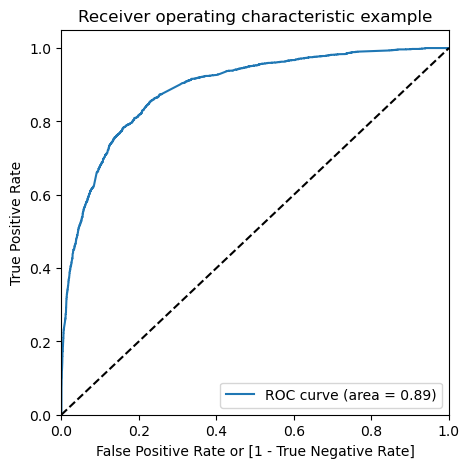

In [288]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Area under curve is 0.89 this curve is a good one.

## Finding of optimal cut-off value

In [289]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167698,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.117144,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232396,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.863667,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.685396,7987,1,1,1,1,1,1,1,1,0,0,0


In [290]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609353  0.970973  0.382843
0.2   0.2  0.760038  0.916190  0.662228
0.3   0.3  0.802866  0.849550  0.773624
0.4   0.4  0.817981  0.783729  0.839437
0.5   0.5  0.817824  0.709321  0.885787
0.6   0.6  0.802551  0.603843  0.927017
0.7   0.7  0.786963  0.526574  0.950064
0.8   0.8  0.767753  0.445217  0.969782
0.9   0.9  0.720674  0.294358  0.987708


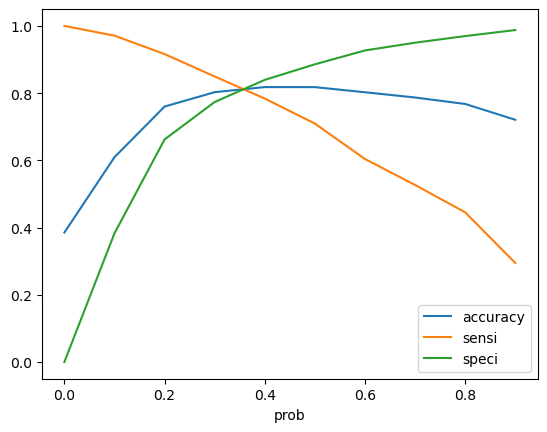

In [291]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Optimal Cut-off value = 0.34

In [292]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167698,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.117144,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232396,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.863667,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.685396,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [293]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.167698,3009,0,1,1,0,0,0,0,0,0,0,0,0,17
1,0,0.117144,1012,0,1,1,0,0,0,0,0,0,0,0,0,12
2,0,0.232396,9226,0,1,1,1,0,0,0,0,0,0,0,0,23
3,1,0.863667,4750,1,1,1,1,1,1,1,1,1,1,0,1,86
4,1,0.685396,7987,1,1,1,1,1,1,1,1,0,0,0,1,69


### Model Evaluation

In [294]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.805384978743505


In [295]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3109,  796],
       [ 440, 2006]])

In [296]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

### Sensitivity 

In [297]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8201144726083401


### Specificity

In [298]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7961587708066581


### False Positive rate

In [299]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20384122919334188


### Positive Predictive Value

In [300]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7159172019985724


### Negative Predictive Value

In [301]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8760214144829529


In [302]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 711, 1735]])

### Precision

In [303]:


print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7955066483264558


### Recall

In [304]:
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7093213409648406


In [305]:
from sklearn.metrics import precision_score, recall_score

### Precision

In [306]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7955066483264558


In [307]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7093213409648406


### Precision and recall tradeoff

In [308]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [309]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Trade-off curve between precision and recall

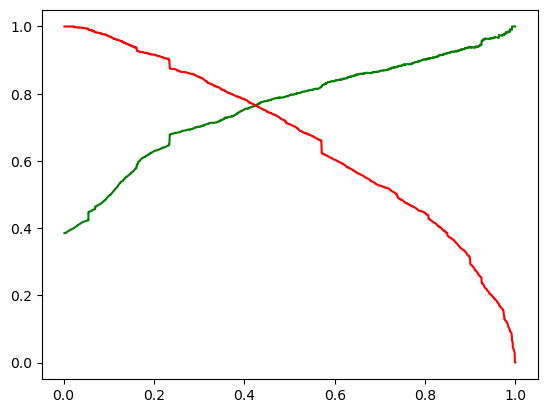

In [310]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on test data

### Scaling the test data

In [311]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [312]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1490,0,1.887326,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [313]:
X_test.shape

(2723, 20)

In [314]:
X_test_sm = sm.add_constant(X_test)

In [315]:
col1.shape

(20,)

In [316]:
X_test_sm.shape

(2723, 21)

In [317]:
y_test_pred = result.predict(X_test_sm)


In [318]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [319]:
y_pred_1.head()

,0
3271,0.127047
1490,0.963851
7936,0.109641
4216,0.910459
3830,0.138314


In [320]:
y_test_df = pd.DataFrame(y_test)

In [321]:
y_test_df['Prospect ID'] = y_test_df.index

In [322]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [323]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [324]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.127047
1,1,1490,0.963851
2,0,7936,0.109641
3,1,4216,0.910459
4,0,3830,0.138314


In [325]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [326]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [327]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.127047
1,1490,1,0.963851
2,7936,0,0.109641
3,4216,1,0.910459
4,3830,0,0.138314


In [328]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [329]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.127047,0
1,1490,1,0.963851,1
2,7936,0,0.109641,0
3,4216,1,0.910459,1
4,3830,0,0.138314,0


In [330]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8035255233198678


In [331]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1387,  347],
       [ 188,  801]])

In [332]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

### Sensitivity

In [333]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8099089989888777


### Specificity

In [334]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7998846597462514


In [335]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.127047,0,13
1,1490,1,0.963851,1,96
2,7936,0,0.109641,0,11
3,4216,1,0.910459,1,91
4,3830,0,0.138314,0,14


Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.4 %

Sensitivity : 80.1 %

Specificity : 80.0 %


Results :
1) Comparing the values obtained for Train & Test:
Train Data:
Accuracy : 81.8 %

Sensitivity : 70.9 %

Specificity : 88.6 %

Test Data:
Accuracy : 80.4 %

Sensitivity : 80.1 %

Specificity : 80.0 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.



2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.


In [336]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.963851,1,96
3,4216,1,0.910459,1,91
8,4223,1,0.924772,1,92
16,1946,1,0.929171,1,93
21,2461,1,0.993784,1,99
...,...,...,...,...,...
2694,1566,1,0.951544,1,95
2699,6461,1,0.964986,1,96
2703,5741,1,0.906944,1,91
2715,6299,1,0.887788,1,89


So there are 395 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [337]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963,
       6947, 4807,  446,  789, 8372, 5805, 3758,  337, 1561,  737, 9034,
       6423, 8286, 7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860,
       7253, 4297,  200, 5490, 1995, 6532, 4498, 5797, 8687,  831, 7653,
        572, 4149,  243, 6743, 3307, 3976, 5769, 1051, 1663, 3288, 6557,
       8959, 7521, 8282, 8213, 9063, 5292, 6913, 6015, 1481,  785, 3265,
       3285, 7433, 2460, 3858, 3810, 2009, 8106,  373, 3055, 7417, 4179,
       8076, 8568, 7268, 6784, 6754, 2960, 7753, 3983, 4487,  802, 8745,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       7175, 1675, 6999, 5932, 5826, 8492, 6499, 2481, 3439, 4612, 7129,
       4793, 1557, 4837, 2495,  822, 2378, 5075, 7699, 5638, 2342, 8077,
       2727,  720, 7489, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461,
       2427, 5087,  174, 2674, 8065, 2095, 1568, 85

In [338]:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.848440
Lead Source_Reference                                   3.283135
Last Activity_Had a Phone Conversation                  2.072232
What is your current occupation_Working Professional    2.046897
const                                                   1.489205
Total Time Spent on Website                             1.097189
Lead Source_Olark Chat                                  1.057345
Last Activity_SMS Sent                                  0.452906
Lead Source_Direct Traffic                             -0.241707
What is your current occupation_Unemployed             -0.591823
Last Activity_Converted to Lead                        -0.871951
Last Activity_Email Bounced                            -0.964763
Last Notable Activity_Email Opened                     -1.016362
Lead Origin_Landing Page Submission                    -1.065510
Specialization_Others                                  -1.149379
Last Activity_Olark Chat 